In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.dropna(inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Data Expolration

In [3]:
df.shape

(183, 11)

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') 
df.drop('cabin',axis =1,inplace=True) #drop the column cabin
df.drop('ticket',axis =1,inplace=True) #drop the column ticket
df['age'].fillna(df['age'].mean(), inplace = True) #fill the gaps(missing values) with mean

<ipython-input-4-c1134c9f77fb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [5]:
df.isna().sum() #checking if there are any missing values

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  183 non-null    int64  
 1   pclass    183 non-null    int64  
 2   name      183 non-null    object 
 3   sex       183 non-null    object 
 4   age       183 non-null    float64
 5   sibsp     183 non-null    int64  
 6   parch     183 non-null    int64  
 7   fare      183 non-null    float64
 8   embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [8]:
df.count()

survived    183
pclass      183
name        183
sex         183
age         183
sibsp       183
parch       183
fare        183
embarked    183
dtype: int64

In [9]:
df['sex']=df['sex'].replace(['male'],0) #enumarate the gender( 0 for male and 1 for female)
df['sex']=df['sex'].replace(['female'],1)

<AxesSubplot:xlabel='age', ylabel='sex'>

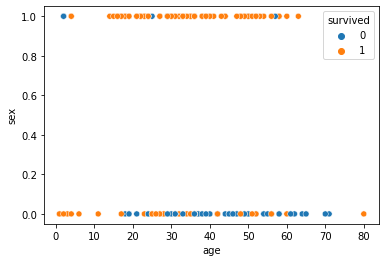

In [10]:
sns.scatterplot(x='age', y='sex' , hue='survived', data=df)

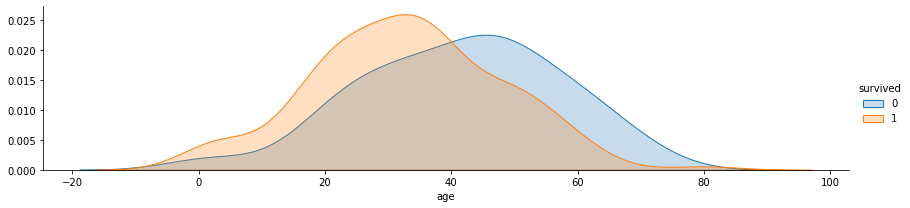

In [11]:
age= sns.FacetGrid( df, hue = 'survived',  aspect=4 )
age.map(sns.kdeplot, 'age', shade= True )
age.add_legend()

C:\Users\49178\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


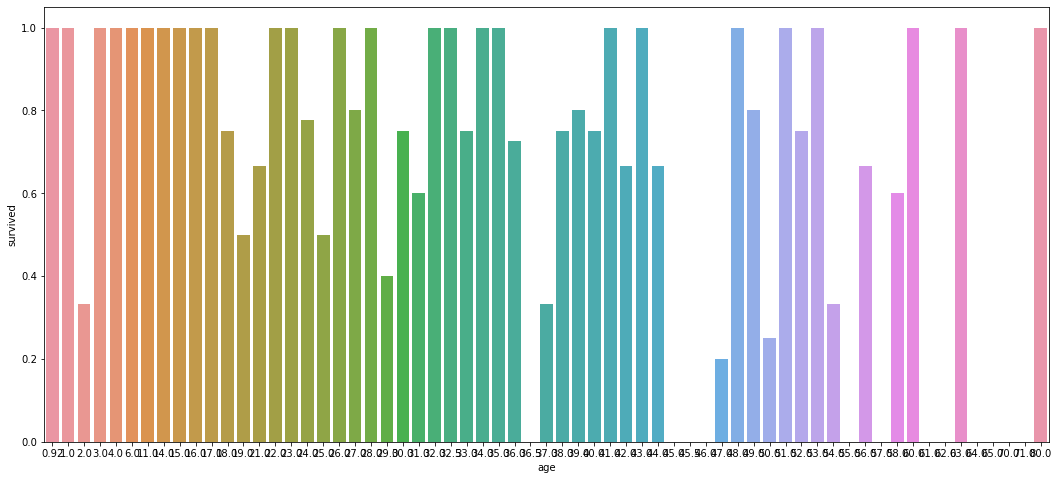

In [12]:
age1=df[['survived','age']].groupby('age', as_index=False).mean()
plt.figure(figsize=(18,8))
sns.barplot('age','survived', data=age1);

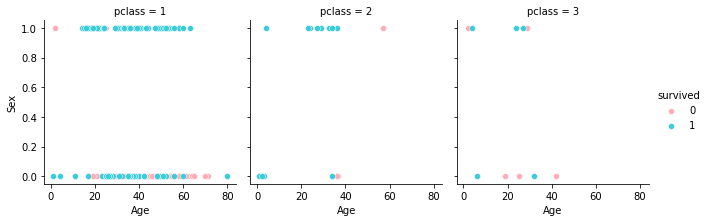

In [13]:
grid = sns.FacetGrid(data=df, col='pclass', hue='survived', palette=['#FFADB9', '#3BCCDA'] )
grid.map_dataframe(sns.scatterplot, x='age', y='sex')
grid.add_legend()
grid.set_xlabels("Age")
grid.set_ylabels("Sex")
sns.despine()


In [14]:
df.groupby('sex')[["survived"]].mean().sort_values(by='survived', ascending=False)
#checking the survived people's rate by sex

,survived
sex,
1,0.931818
0,0.431579


C:\Users\49178\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

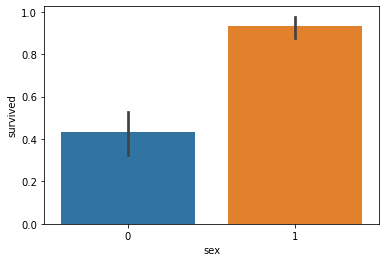

<Figure size 864x288 with 0 Axes>

In [15]:
sns.barplot('sex', 'survived', data=df); #plot the survived people according to gender(0 for male and 1 for female)
plt.figure(figsize=(12,4))
#plotting the survived people's rate by sex

C:\Users\49178\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


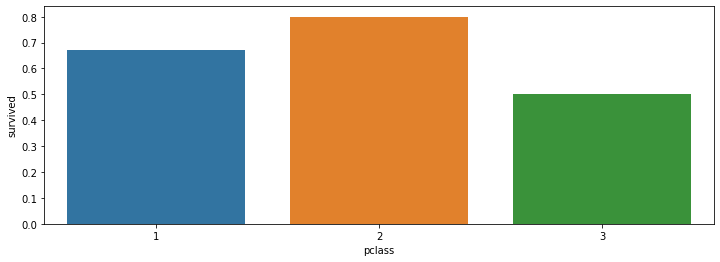

In [16]:
sex=df[["survived",'pclass']].groupby('pclass', as_index=False).mean()
plt.figure(figsize=(12,4))
sns.barplot('pclass','survived', data=sex);
#plotting the survived people's rate by class

In [17]:
df.groupby('pclass')[["survived"]].mean().sort_values(by='survived', ascending=False) 
#checking the survived people's rate by class

,survived
pclass,
2,0.800000
1,0.670886
3,0.500000


### Train Test Split

In [18]:
df.head(5) #checking again how the data looks

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
PassengerId,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,16.7000,S
12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,26.5500,S


In [19]:
df.reset_index(level=0, inplace=True) #unindex the column 
df

,PassengerId,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
2,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,16.7000,S
4,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...,...
178,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,52.5542,S
179,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,5.0000,S
180,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,83.1583,C
181,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [21]:
X = df[['pclass', 'age', 'sex', 'sibsp', 'parch','fare', 'embarked']]  #assigning values to X and y
y=df['survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Feature engineering 

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer


In [24]:
transf = ColumnTransformer([
    ('impute and scale age', make_pipeline(SimpleImputer(strategy='median', missing_values=np.nan), 
                                       MinMaxScaler(), KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile')), ['age', 'fare']),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['pclass','sex']),
    ('impute and split', make_pipeline(SimpleImputer(strategy='most_frequent',missing_values=np.nan), OneHotEncoder(sparse=False, handle_unknown='ignore')),['embarked']),
    ('do_nothing', 'passthrough', ['parch', 'sibsp']),
])

In [25]:
transf.fit(X_train)                    # dataFrame with titanic data
Xtrain = transf.transform(X_train)  # for training the model
Xtest = transf.transform(X_test)    # DataFrame for prediction

### DecisionTree Model

In [26]:
dt_model = DecisionTreeClassifier(max_depth=3)  # we allow that many questions


In [27]:
dt_model.fit(Xtrain, y_train) #fit the model
dt_model.score(Xtrain, y_train) #check the score

0.8102189781021898

In [59]:
dt_acc=round(dt_model.score(Xtest,y_test),3)
dt_acc

0.717

In [29]:
#make predictions to check the actual model

ypred = dt_model.predict(Xtest)

In [30]:
#make predictions to check the training model

ypredtrain = dt_model.predict(Xtrain)

In [31]:
confusion_matrix(y_test,ypred)

array([[11,  7],
       [ 6, 22]], dtype=int64)

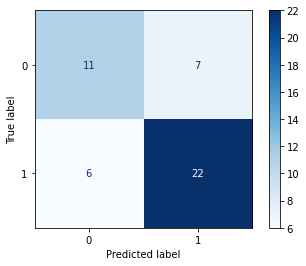

In [32]:
plot_confusion_matrix(dt_model, Xtest, y_test,cmap=plt.cm.Blues)

In [33]:
#accuracy score of the actual model 

accuracy_score(ypred, y_test)

0.717391304347826

In [34]:
#calculate accuracy score of the training model 

accuracy_score(ypredtrain, y_train)

0.8102189781021898

In [35]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.76      0.79      0.77        28

    accuracy                           0.72        46
   macro avg       0.70      0.70      0.70        46
weighted avg       0.71      0.72      0.72        46



### Random Forest Model

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6.5)  #Hyperparam: n_estimators(number of trees)

In [37]:
rf_model.fit(Xtrain, y_train)
rf_model.score(Xtrain, y_train)

0.8978102189781022

In [38]:
rf_acc=round(rf_model.score(Xtest,y_test),3)
rf_acc

0.674

In [39]:
#make predictions to check the actual model

rf_ypred = rf_model.predict(Xtest)
#make predictions to check the training model

rf_ypredtrain = rf_model.predict(Xtrain)
rf_ypred, rf_ypredtrain

(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0], dtype=int64),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1], dtype=int64))

In [40]:
confusion_matrix(y_test,rf_ypred)

array([[ 7, 11],
       [ 4, 24]], dtype=int64)

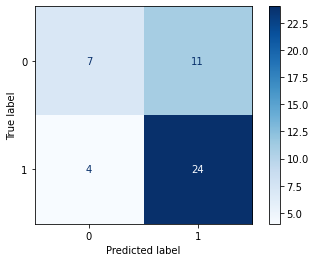

In [41]:
plot_confusion_matrix(rf_model, Xtest, y_test,cmap=plt.cm.Blues)

In [42]:
#accuracy score of the actual model 

accuracy_score(rf_ypred, y_test)

0.6739130434782609

In [43]:
#calculate accuracy score of the training model 

accuracy_score(rf_ypredtrain, y_train)

0.8978102189781022

In [44]:
print(classification_report(y_test, rf_ypred))

              precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.69      0.86      0.76        28

    accuracy                           0.67        46
   macro avg       0.66      0.62      0.62        46
weighted avg       0.67      0.67      0.65        46



#### Feature Importance -calculating a score for all the input features for a given model

In [45]:
importance = rf_model.feature_importances_
names= ('pclass', 'age', 'sex', 'sibsp', 'parch','fare', 'embarked')
# summarize feature importance
data=[]
for i,v in zip(names, importance):
        print('%20s, Score: %.5f' % (i,v))
        data.append({'name':i, 'score':v}) #combining the data under one list
        

              pclass, Score: 0.04591
                 age, Score: 0.03913
                 sex, Score: 0.03880
               sibsp, Score: 0.02708
               parch, Score: 0.04566
                fare, Score: 0.01948
            embarked, Score: 0.03968


In [46]:
df_rf = pd.DataFrame(data) #turned the list combined data into a dataframe for plotting 

df_rf

,name,score
0,pclass,0.045914
1,age,0.039133
2,sex,0.038796
3,sibsp,0.027075
4,parch,0.045664
5,fare,0.019483
6,embarked,0.039682


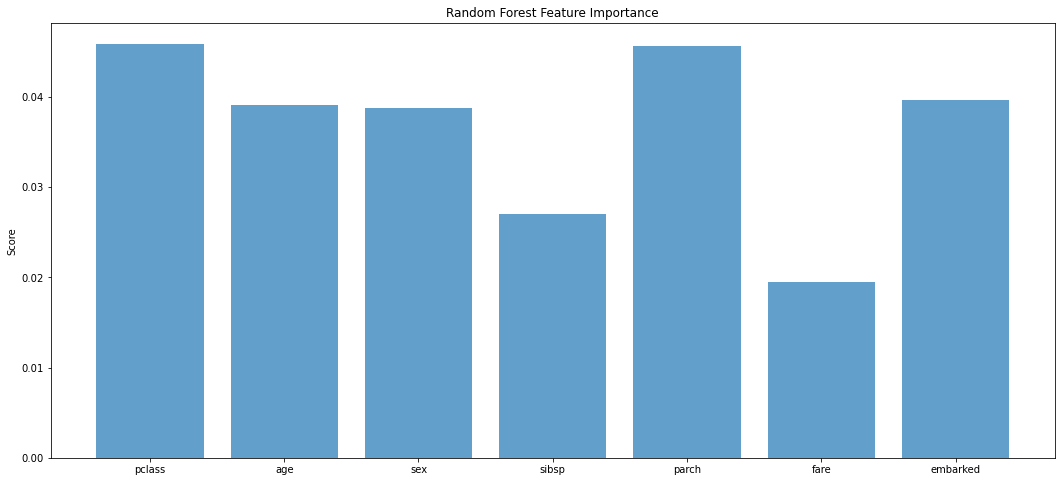

In [47]:
fig = plt.figure(figsize=(18,8)) #set the plot's size

plt.bar(df_rf.name, df_rf.score, alpha=0.7 )  #create a bar plot
plt.title('Random Forest Feature Importance') #entitle the plot
                                                                  
plt.ylabel('Score') #entitle the y 
plt.show()

### Logistic Regression Model

In [48]:
lg_model = LogisticRegression() #initialize the model
lg_model.fit(Xtrain, y_train)   # train the model
lg_model.score(Xtrain, y_train) # calculate accuracy


0.8102189781021898

In [49]:
lg_acc=round(lg_model.score(Xtest,y_test),3)
lg_acc

0.696

In [50]:
#make predictions to check the actual model

lg_ypred = lg_model.predict(Xtest)
#make predictions to check the training model

lg_ypredtrain = lg_model.predict(Xtrain)
lg_ypred, lg_ypredtrain

(array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1], dtype=int64))

In [51]:
confusion_matrix(y_test,lg_ypred)

array([[ 9,  9],
       [ 5, 23]], dtype=int64)

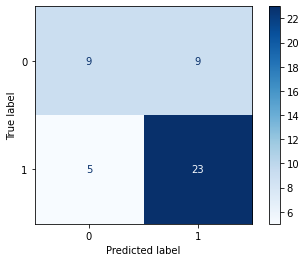

In [52]:
plot_confusion_matrix(lg_model, Xtest, y_test,cmap=plt.cm.Blues)

In [53]:
lg_model.intercept_  # w0
lg_model.coef_    # w1, w2, w3b

array([[ 0.69343787, -0.32729552,  0.73059525, -0.39849041, -0.6982601 ,
        -0.62604489,  0.31944301, -0.11489657, -0.08167768,  0.50316323,
         0.08869261,  0.21911949, -0.30782501, -1.36648285,  1.36646995,
         0.21977862, -0.21979153, -0.26188424,  0.51085324]])

In [54]:
#accuracy score of the actual model 

accuracy_score(lg_ypred, y_test)

0.6956521739130435

In [55]:
#calculate accuracy score of the training model 

accuracy_score(lg_ypredtrain, y_train)

0.8102189781021898

In [56]:
print(classification_report(y_test, lg_ypred))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.72      0.82      0.77        28

    accuracy                           0.70        46
   macro avg       0.68      0.66      0.66        46
weighted avg       0.69      0.70      0.69        46



### Evaluation of all the Models

In [60]:
models = pd.DataFrame({
    'Model': [ 'Decision Tree', 'Random Forest', 'Logistic Regression',],
    
    'Score': [ dt_acc, rf_acc, lg_acc ]
    })

models.sort_values(by='Score', ascending=False,)

,Model,Score
0,Decision Tree,0.717
2,Logistic Regression,0.696
1,Random Forest,0.674


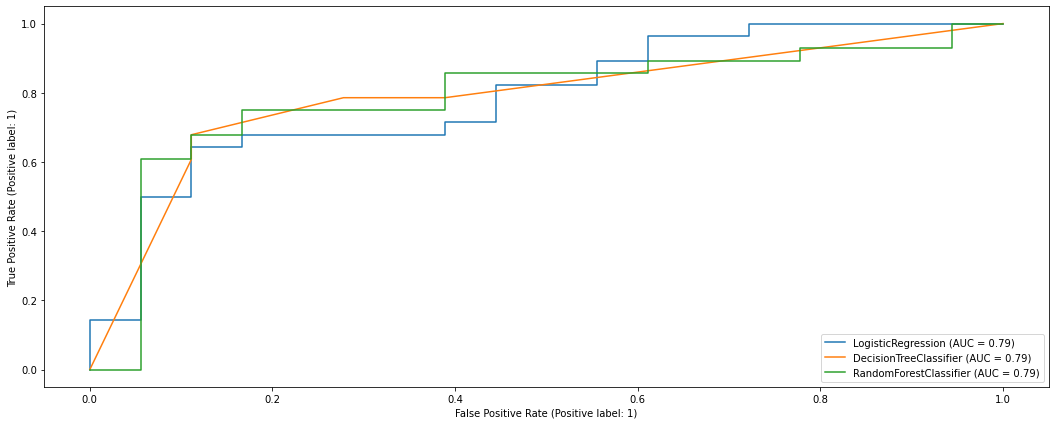

In [70]:
#plot the ROC Curve
from sklearn import metrics

fig, axes = plt.subplots(1,1, figsize=(18,7))
metrics.plot_roc_curve(lg_model, Xtest, y_test, ax=axes)
metrics.plot_roc_curve(dt_model, Xtest, y_test,ax=axes)
metrics.plot_roc_curve(rf_model, Xtest, y_test, ax=axes)